 #                                                  STATISTICAL THINKING

## Introduction
The Millennium Development Goals were a set of 8 goals for 2015 that were defined by the United Nations to help improve living conditions and the conditions of our planet. Key indicators were defined for each of these goals, to see whether they were being met. We will have a look at some of the key indicators from Goal 7: Ensure environmental sustainability, namely carbon dioxide emissions, protected land and sea areas, and forests.

* We will explore the dataset provided and analyse the polution behaviours of the countries over the past years.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # for displaying all columns

sns.set()

In [2]:
df = pd.read_csv("mdg.csv")

In [3]:
df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,2.1,NaN,E,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.36,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,0.46,NaN,C,,,,,,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,,28.1,NaN,C,,,,,,,,,,,,,28.5,NaN,C,,,,,,,,,,,,,28.3,NaN,C,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,,,,,,,,,,,,,,,,,,,,,,,,


 The Dataframe has 690 rows and 95 Columns

 # MISSING VALUES

In [4]:
#since there are empty cells. they need to be replaced with "NaN" before finding the some of missing values
df1 = df.replace(r'^\s*$', np.nan, regex=True)

df1.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,Type.1,1992,Footnotes.2,Type.2,1993,Footnotes.3,Type.3,1994,Footnotes.4,Type.4,1995,Footnotes.5,Type.5,1996,Footnotes.6,Type.6,1997,Footnotes.7,Type.7,1998,Footnotes.8,Type.8,1999,Footnotes.9,Type.9,2000,Footnotes.10,Type.10,2001,Footnotes.11,Type.11,2002,Footnotes.12,Type.12,2003,Footnotes.13,Type.13,2004,Footnotes.14,Type.14,2005,Footnotes.15,Type.15,2006,Footnotes.16,Type.16,2007,Footnotes.17,Type.17,2008,Footnotes.18,Type.18,2009,Footnotes.19,Type.19,2010,Footnotes.20,Type.20,2011,Footnotes.21,Type.21,2012,Footnotes.22,Type.22,2013,Footnotes.23,Type.23,2014,Footnotes.24,Type.24,2015,Footnotes.25,Type.25,2016,Footnotes.26,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,G,1426.5,NaN,G,1375.1,NaN,G,1320.1,NaN,G,1268.8,NaN,G,1199.1,NaN,G,1114.8,NaN,G,1056.1,NaN,G,832.4,NaN,G,781.1,NaN,G,645.4,NaN,G,894.7,NaN,G,1037.8,NaN,G,957.1,NaN,G,1338.5,NaN,G,1657.5,NaN,G,2280.9,NaN,G,4217.1,NaN,G,6776.6,NaN,G,8470.8,NaN,G,12251.4,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,G,2387.2,NaN,G,2343.2,NaN,G,1928.8,NaN,G,2086.5,NaN,G,2016.9,NaN,G,1543.8,NaN,G,1752.8,NaN,G,2984.9,NaN,G,3021.6,NaN,G,3223.3,NaN,G,3751.3,NaN,G,4294.1,NaN,G,4165.7,NaN,G,4253.7,NaN,G,3865,NaN,G,4477.4,NaN,G,4657.1,NaN,G,4488.4,NaN,G,4415.1,NaN,G,4668.1,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dealing with mising values
null_columns=df1.columns[df1.isnull().any()]
df1[null_columns].isnull().sum().sort_values(ascending=False).head(50)

Type.29         690
Footnotes.18    690
Footnotes.14    690
Footnotes.1     690
Footnotes.21    690
Footnotes.9     690
Footnotes.2     690
Footnotes.19    690
Footnotes.8     690
Footnotes.3     690
Footnotes.11    690
Type.22         690
Footnotes.7     690
Footnotes.17    690
Footnotes.4     690
Footnotes.12    690
Footnotes.16    690
Footnotes.13    690
Footnotes.5     690
Footnotes.6     690
Footnotes.22    690
2012            690
2013            690
Footnotes.23    690
2019            690
Type.28         690
Footnotes.28    690
2018            690
Type.27         690
Footnotes.27    690
2017            690
Type.26         690
Footnotes.26    690
2016            690
Type.25         690
Footnotes.25    690
2015            690
Footnotes.24    690
Type.23         690
Footnotes.29    690
Footnotes.10    685
Footnotes       685
Footnotes.20    685
Footnotes.15    685
Type.1          508
1991            508
1993            486
Type.3          486
1992            486
Type.2          486


 # CLEANING THE DATA

In [6]:
#since we have columns with 690 missing value, it means there is no data available along the columns.. therefore all columns with 690 missing values should be dropped
df2 = df1.dropna(how='all', axis='columns')
df2.head() 

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Type.1,1992,Type.2,1993,Type.3,1994,Type.4,1995,Type.5,1996,Type.6,1997,Type.7,1998,Type.8,1999,Type.9,2000,Footnotes.10,Type.10,2001,Type.11,2002,Type.12,2003,Type.13,2004,Type.14,2005,Footnotes.15,Type.15,2006,Type.16,2007,Type.17,2008,Type.18,2009,Type.19,2010,Footnotes.20,Type.20,2011,Type.21,2014,Type.24
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,NaN,E,NaN,NaN,NaN,NaN
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,G,1426.5,G,1375.1,G,1320.1,G,1268.8,G,1199.1,G,1114.8,G,1056.1,G,832.4,G,781.1,NaN,G,645.4,G,894.7,G,1037.8,G,957.1,G,1338.5,NaN,G,1657.5,G,2280.9,G,4217.1,G,6776.6,G,8470.8,NaN,G,12251.4,G,NaN,NaN
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,C
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,NaN,C,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,G,2387.2,G,2343.2,G,1928.8,G,2086.5,G,2016.9,G,1543.8,G,1752.8,G,2984.9,G,3021.6,NaN,G,3223.3,G,3751.3,G,4294.1,G,4165.7,G,4253.7,NaN,G,3865,G,4477.4,G,4657.1,G,4488.4,G,4415.1,NaN,G,4668.1,G,NaN,NaN


In [7]:
df2.columns


Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990',
       'Footnotes', 'Type', '1991', 'Type.1', '1992', 'Type.2', '1993',
       'Type.3', '1994', 'Type.4', '1995', 'Type.5', '1996', 'Type.6', '1997',
       'Type.7', '1998', 'Type.8', '1999', 'Type.9', '2000', 'Footnotes.10',
       'Type.10', '2001', 'Type.11', '2002', 'Type.12', '2003', 'Type.13',
       '2004', 'Type.14', '2005', 'Footnotes.15', 'Type.15', '2006', 'Type.16',
       '2007', 'Type.17', '2008', 'Type.18', '2009', 'Type.19', '2010',
       'Footnotes.20', 'Type.20', '2011', 'Type.21', '2014', 'Type.24'],
      dtype='object')

In [8]:
# New Dataframe missing values in descending order
null_columns=df2.columns[df2.isnull().any()]
df2[null_columns].isnull().sum().sort_values(ascending=False)

Footnotes       685
Footnotes.20    685
Footnotes.10    685
Footnotes.15    685
Type.1          508
1991            508
Type.2          486
1993            486
Type.3          486
1992            486
1994            485
Type.4          485
Type.6          484
1996            484
Type.5          483
1995            483
Type.8          481
1999            481
Type.9          481
Type.7          481
1997            481
1998            481
Type.11         479
2001            479
2002            478
Type.12         478
2003            478
2004            478
Type.14         478
Type.13         478
2006            476
Type.16         476
2007            475
Type.17         475
2008            475
Type.18         475
2009            475
Type.19         475
2011            475
Type.21         475
Type.24         467
2014            467
2005            254
Type.15         253
2010            252
Type.20         251
1990             63
Type             62
2000             34
Type.10          33


In [9]:
#droping Footnote columns to have consistancy in the data
df2.drop(['Footnotes','Footnotes.10','Footnotes.15','Footnotes.20'], axis='columns', inplace=True)


In [10]:
df2.columns


Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990', 'Type',
       '1991', 'Type.1', '1992', 'Type.2', '1993', 'Type.3', '1994', 'Type.4',
       '1995', 'Type.5', '1996', 'Type.6', '1997', 'Type.7', '1998', 'Type.8',
       '1999', 'Type.9', '2000', 'Type.10', '2001', 'Type.11', '2002',
       'Type.12', '2003', 'Type.13', '2004', 'Type.14', '2005', 'Type.15',
       '2006', 'Type.16', '2007', 'Type.17', '2008', 'Type.18', '2009',
       'Type.19', '2010', 'Type.20', '2011', 'Type.21', '2014', 'Type.24'],
      dtype='object')

 # 1. Countries that are represented. Missing values are there by country, year and series.

 #### Number of country represented

In [11]:
df['Country'].nunique()

230

 ### Missing values by Country, Year, Series

In [12]:
#missing values by country in ascending order
display(df1.groupby('Country').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False).head(50))
display(df1.groupby('Country').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False).tail(50))

Country
Yugoslavia [former Socialist Federal Republic]    266
Sudan                                             264
South Sudan                                       264
Monaco                                            260
United States Virgin Islands                      256
San Marino                                        256
Mayotte                                           256
Puerto Rico                                       256
Tuvalu                                            256
Guam                                              256
Tokelau                                           256
American Samoa                                    256
Northern Mariana Islands                          256
Western Sahara                                    256
Liechtenstein                                     246
Montenegro                                        244
Serbia                                            244
Lesotho                                           242
Serbia and Montenegr

Country
Italy                                     212
Panama                                    212
Oman                                      212
Liberia                                   212
Marshall Islands                          212
Malta                                     212
Mali                                      212
Maldives                                  212
Malaysia                                  212
Malawi                                    212
Madagascar                                212
Luxembourg                                212
Zambia                                    212
Lebanon                                   212
Norway                                    212
Lao People's Democratic Republic          212
Kuwait                                    212
Korea, Republic of                        212
Korea, Democratic People's Republic of    212
Kiribati                                  212
Kenya                                     212
Jordan                    

In [13]:
# missing values by series
df1.groupby('Series').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False)

Series
Terrestrial and marine areas protected to total territorial area, percentage    19362
Proportion of land area covered by forest, percentage                           18892
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)             11550
dtype: int64

In [14]:
# Missing values by year
df1.loc[: , ('1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019')].isnull().sum().sort_values(ascending = False)

2019    690
2017    690
2016    690
2015    690
2013    690
2012    690
2018    690
1991    508
1993    486
1992    486
1994    485
1996    484
1995    483
1997    481
1998    481
1999    481
2001    479
2004    478
2002    478
2003    478
2006    476
2007    475
2008    475
2009    475
2011    475
2014    467
2005    254
2010    252
1990     63
2000     34
dtype: int64

# 2. Top and bottom 5 countries in terms of C02 emissions in 1990 and their emissions and how they changed by 2011

In [15]:
# Slicing the dataframes for 1990 and 2011
#1990
df_90 = df2.loc[:, ('Country','1990') ]
display(df_90)

#2011
df_11 = df2.loc[:, ('Country','2011') ]
display(df_11)

,Country,1990
0,Afghanistan,2.1
1,Afghanistan,2676.9
2,Afghanistan,0.36
3,Albania,28.8
4,Albania,7488
...,...,...
685,Zambia,2445.9
686,Zambia,36.05
687,Zimbabwe,57.3
688,Zimbabwe,15504.1


,Country,2011
0,Afghanistan,NaN
1,Afghanistan,12251.4
2,Afghanistan,NaN
3,Albania,NaN
4,Albania,4668.1
...,...,...
685,Zambia,3047.3
686,Zambia,NaN
687,Zimbabwe,NaN
688,Zimbabwe,9860.6


In [16]:
#filling NaN values with '0' 
#1990
df_90['1990'] = df_90['1990'].fillna(0)
display(df_90)

#2011
df_11['2011'] = df_11['2011'].fillna(0)
display(df_11)

,Country,1990
0,Afghanistan,2.1
1,Afghanistan,2676.9
2,Afghanistan,0.36
3,Albania,28.8
4,Albania,7488
...,...,...
685,Zambia,2445.9
686,Zambia,36.05
687,Zimbabwe,57.3
688,Zimbabwe,15504.1


,Country,2011
0,Afghanistan,0
1,Afghanistan,12251.4
2,Afghanistan,0
3,Albania,0
4,Albania,4668.1
...,...,...
685,Zambia,3047.3
686,Zambia,0
687,Zimbabwe,0
688,Zimbabwe,9860.6


In [17]:
#Groupby Country sum
df5 = df_90.groupby('Country')['1990'].apply(lambda x : x.astype(float).sum()) #1990
df6 = df_11.groupby('Country')['2011'].apply(lambda x : x.astype(float).sum()) #2011

In [18]:
display(df5.reset_index().sort_values(['1990'],ascending=False))
display(df6.reset_index().sort_values(['2011'],ascending=False))



,Country,1990
217,United States,4823599.85
41,China,2460773.08
100,Japan,1094358.17
92,India,690601.04
215,United Kingdom,555919.37
...,...,...
131,Monaco,0.18
179,Serbia and Montenegro,0.00
204,Tokelau,0.00
174,San Marino,0.00


,Country,2011
41,China,9019518.2
217,United States,5305569.6
92,India,2074344.9
166,Russian Federation,1808073.0
100,Japan,1187657.0
...,...,...
83,Guam,0.0
179,Serbia and Montenegro,0.0
188,South Sudan,0.0
192,Sudan,0.0


  ### 1990
##### The top 5  countries and their emission 
* United States = 4823599.85
* China = 2460773.08
* Japan = 1094358.17
* India = 690601.04
* United Kingdom = 555919.37 
##### The bottom 5  countries and their emission
* Sudan = 1.28
* Monaco = 0.18
* Serbia and Montenegro = 0.00
* Tokelau = 0.00
* San Marino = 0.00

 ### 2011
##### The top 5  countries and their emission 
* China	= 9019518.2
* United States = 5305569.6
* India = 2074344.9
* Russian Federation = 1808073.0
* Japan	= 1187657.0 
##### The bottom 5  countries and their emission
* Guam	0.0
* Serbia and Montenegro	0.0
* South Sudan	0.0
* Sudan	0.0
* Mayotte 0.0



 Four countries remained within the Top 5 , in 1990 and 2011, Russian Federation replaced United Kindom in 2011 from 1990 top 5.
 The bottom 5 completely with non of the countries that were in th bottom 5 in 1990, appearing again in botton 5 in 2011.



# 3. Mean and median of 1990


In [19]:
display(df5.describe())

count    2.300000e+02
mean     7.168503e+04
std      3.713651e+05
min     -2.998600e+03
25%      8.575250e+01
50%      1.236955e+03
75%      2.138662e+04
max      4.823600e+06
Name: 1990, dtype: float64

Mean = 71 685,03 
median = 1 236.96

The median being very small compared to the mean, it means the any many small numbers compared to largest number, yet the largest numbers are so large that they affect the average.

In [20]:
df5.median()

1236.955

In [21]:
(16487557.04 + 2*2998.60)/230

71711.10539130434

# 4. The minimum, maximum and interquartile range of the CO2 emissions for 1990

* The minimum = 0
* The maximum = 4823599.85

* Q1 = 857.52
* Q2 = 1 236.96
* Q3 = 21 386.62

** Based on the information, the distribution of the data is negatively skewed(to the left)

# 5.  Histogram of the CO2 emissions for 1990


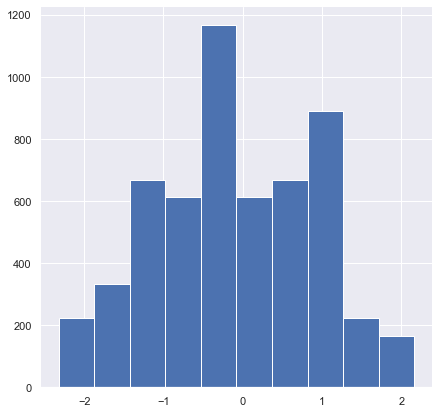

In [22]:
# df5 = df_90.groupby('Country')['1990'].apply(lambda x : x.astype(float).sum())
# df5.plot(kind = 'hist', bins = 10)
f, axes = plt.subplots(figsize=(7, 7), sharex=True)
sns.despine(left=True)
# Protected Area histogram
df5 = df_90
from matplotlib.pyplot import hist
df5 = pd.DataFrame({
    'Country': np.random.randn(100),
    '1990': 100 * np.random.rand()
})

_ = hist(df5.Country, weights=df5['1990'])


The shape of the histogram is skewed to the left as expected

# 6. The standard deviation and standard error of the mean in 1990

In [23]:
# the standard deviation
df5['1990'].std()

1.4282446375932694e-13

In [24]:
# Standard error
df5['1990'].sem()

1.4282446375932695e-14

# 7. line graph to show C02 emissions in Brazil, Russia, China, India, the USA and South Africa over time

In [25]:
#index positions
bra = df2['Country'][df2['Country']=='Brazil']
rus = df2['Country'][df2['Country']=='Russian Federation']
chi = df2['Country'][df2['Country']=='China']
ind = df2['Country'][df2['Country']=='India']
usa = df2['Country'][df2['Country']=='United States']
rsa = df2['Country'][df2['Country']=='South Africa']

display(bra)
display(rus)
display(chi)
display(ind)
display(usa)
display(rsa)


81    Brazil
82    Brazil
83    Brazil
Name: Country, dtype: object

498    Russian Federation
499    Russian Federation
500    Russian Federation
Name: Country, dtype: object

123    China
124    China
125    China
Name: Country, dtype: object

276    India
277    India
278    India
Name: Country, dtype: object

651    United States
652    United States
653    United States
Name: Country, dtype: object

561    South Africa
562    South Africa
563    South Africa
Name: Country, dtype: object

In [26]:
#slicing the dataframe
df_cou = df2.loc[(81,82,83,123,124,125,276,277,278,498,499,500,561,562,563,651,652,653), ('Country','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2014') ].reset_index(drop=True)

In [27]:
df_cou.head()


,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
0,Brazil,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,NaN,NaN,NaN,NaN,63.7,NaN,NaN,NaN,NaN,62.4,NaN,NaN
1,Brazil,208887,219330.6,220705.7,230738.6,242154,258347.5,284782.9,300547.3,312289.1,320173.1,327983.8,337433.7,332266.9,321621.6,337826,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9,NaN
2,Brazil,4.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.37
3,China,16.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.8,NaN,NaN,NaN,NaN,20.5,NaN,NaN,NaN,NaN,21.9,NaN,NaN
4,China,2460744,2584538.3,2695982.1,2878694,3058241.3,3320285.2,3463089.1,3469510,3324344.5,3318055.6,3405179.9,3487566.4,3694242.1,4525177,5288166,5790017,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2,NaN


In [28]:
# Fill NaN with '0'
df_cou = df_cou.fillna(0)

In [29]:
df_cou.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
0,Brazil,69,0,0,0,0,0,0,0,0,0,65.6,0,0,0,0,63.7,0,0,0,0,62.4,0,0
1,Brazil,208887,219330.6,220705.7,230738.6,242154,258347.5,284782.9,300547.3,312289.1,320173.1,327983.8,337433.7,332266.9,321621.6,337826,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9,0
2,Brazil,4.73,0,0,0,0,0,0,0,0,0,10.22,0,0,0,0,0,0,0,0,0,0,0,20.37
3,China,16.7,0,0,0,0,0,0,0,0,0,18.8,0,0,0,0,20.5,0,0,0,0,21.9,0,0
4,China,2460744,2584538.3,2695982.1,2878694,3058241.3,3320285.2,3463089.1,3469510,3324344.5,3318055.6,3405179.9,3487566.4,3694242.1,4525177,5288166,5790017,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2,0


In [30]:
#summing the emmisions by country
df_group = df_cou.groupby('Country')[('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2014')].apply(lambda x : x.astype(float).sum()).reset_index()
df_group

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2014
0,Brazil,208960.73,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,320173.1,328059.62,337433.7,332266.9,321621.6,337826.0,347372.6,347668.3,363212.7,387675.2,367147.4,419816.6,439412.9,20.37
1,China,2460773.08,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,3318055.6,3405212.88,3487566.4,3694242.1,4525177.0,5288166.0,5790037.5,6414463.1,6791804.7,7035443.9,7692210.9,8256991.1,9019518.2,15.61
2,India,690601.04,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,1144390.0,1186688.15,1203843.1,1226791.2,1281913.5,1348524.6,1411150.4,1504364.7,1611199.1,1793075.0,1965820.0,1950973.3,2074344.9,3.13
3,Russian Federation,52.99,0.0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,1533968.4,1558169.76,1558002.0,1557660.9,1604968.9,1602955.7,1615736.9,1669618.1,1667597.6,1715639.0,1574367.8,1742589.5,1808073.0,8.75
4,South Africa,319805.58,332618.9,307822.6,321104.5,337576.7,353458.5,358639.9,371327.8,372218.8,371034.4,368621.13,362743.3,347686.6,380810.6,424774.3,391826.6,422445.7,440989.8,469090.0,477806.4,454957.6,477241.7,10.24
5,United States,4823599.85,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,5510430.2,5701873.96,5601404.8,5648727.5,5679222.2,5763456.9,5795194.8,5703871.8,5794923.4,5622464.4,5274132.4,5408902.2,5305569.6,14.82


#### line graph

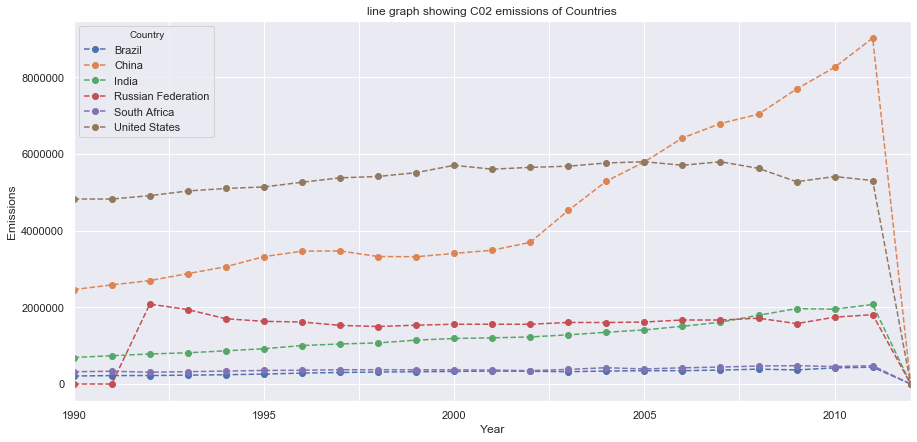

In [31]:
# fig, ax = plt.subplots(figsize=(15,7) )
# df_group.plot(ax=ax)

df_gt = df_group.set_index('Country').T


fig, ax = plt.subplots(figsize=(15,7))
ax.set_title('line graph showing C02 emissions of Countries')
ax.set_ylabel('Emissions')
ax.set_xlabel("Year")
_ = df_gt.plot(ax=ax,linestyle='--', marker='o')

* Brazil and South Africa has slightly increasing trend over the years until 2011
* India has also  been increasing at a constant rate over years until 2011
* Rusian Federation has been almost at a consitant from 1995 until 2011, droping from 1992
* USA has been increasing then later slighty dropped until 2011
* China has a rapid increasing trend from 1990 to 2011, surpassing USA after 2005, USA has been leading until 2005

* All countries tremendously dropped in 2014.

# 8. The mean and standard deviation for land area covered by forest in 1990

In [32]:
# dataframe where land area is covered by forest
df_for = df2[((df2.SeriesCode == 567))]
df_for.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,Type.1,1992,Type.2,1993,Type.3,1994,Type.4,1995,Type.5,1996,Type.6,1997,Type.7,1998,Type.8,1999,Type.9,2000,Type.10,2001,Type.11,2002,Type.12,2003,Type.13,2004,Type.14,2005,Type.15,2006,Type.16,2007,Type.17,2008,Type.18,2009,Type.19,2010,Type.20,2011,Type.21,2014,Type.24
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,E,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.1,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.5,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.3,C,NaN,NaN,NaN,NaN
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,C,NaN,NaN,NaN,NaN
9,16,American Samoa,567,Y,"Proportion of land area covered by forest, per...",90,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,C,NaN,NaN,NaN,NaN
12,20,Andorra,567,Y,"Proportion of land area covered by forest, per...",35.6,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.6,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.6,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.6,E,NaN,NaN,NaN,NaN


In [33]:
# 1990 datafram for land covered by forest
dfor_90 = df_for.loc[:, ('Country','1990') ].reset_index(drop = True)
dfor_90

,Country,1990
0,Afghanistan,2.1
1,Albania,28.8
2,Algeria,0.7
3,American Samoa,90
4,Andorra,35.6
...,...,...
225,Western Sahara,2.7
226,Yemen,1
227,Yugoslavia [former Socialist Federal Republic],NaN
228,Zambia,71


In [34]:
#filling NaN values with '0' 
#1990
dfor_90['1990'] = dfor_90['1990'].fillna(0)
dfor_90

,Country,1990
0,Afghanistan,2.1
1,Albania,28.8
2,Algeria,0.7
3,American Samoa,90
4,Andorra,35.6
...,...,...
225,Western Sahara,2.7
226,Yemen,1
227,Yugoslavia [former Socialist Federal Republic],0
228,Zambia,71


In [35]:
# mean
dfor_90['1990'].astype(float).mean()

31.973478260869573

In [36]:
# Standard deviation
dfor_90['1990'].astype(float).std()

25.738701105023946

A larger standard devation indicates thay data are more spread out

# 9. Histograms for land area covered by forest and percentage of area protected in 1990

In [37]:
# the protected area in 1990
df_pro = df2[((df2.SeriesCode == 616))]
df_pro.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,Type.1,1992,Type.2,1993,Type.3,1994,Type.4,1995,Type.5,1996,Type.6,1997,Type.7,1998,Type.8,1999,Type.9,2000,Type.10,2001,Type.11,2002,Type.12,2003,Type.13,2004,Type.14,2005,Type.15,2006,Type.16,2007,Type.17,2008,Type.18,2009,Type.19,2010,Type.20,2011,Type.21,2014,Type.24
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.46,C
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.91,C
8,12,Algeria,616,Y,Terrestrial and marine areas protected to tota...,5.97,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.98,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.46,C
11,16,American Samoa,616,Y,Terrestrial and marine areas protected to tota...,0.06,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.62,C
14,20,Andorra,616,Y,Terrestrial and marine areas protected to tota...,5.53,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.25,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.5,C


In [38]:
# slicing 
dfpro_90 = df_pro.loc[:, ('Country','1990') ].reset_index(drop = True)
dfpro_90

,Country,1990
0,Afghanistan,0.36
1,Albania,0.15
2,Algeria,5.97
3,American Samoa,0.06
4,Andorra,5.53
...,...,...
225,Western Sahara,0
226,Yemen,0
227,Yugoslavia [former Socialist Federal Republic],NaN
228,Zambia,36.05


In [39]:
#filling NaN values with '0' 
#1990
dfpro_90['1990'] = dfpro_90['1990'].fillna(0)
dfpro_90

,Country,1990
0,Afghanistan,0.36
1,Albania,0.15
2,Algeria,5.97
3,American Samoa,0.06
4,Andorra,5.53
...,...,...
225,Western Sahara,0
226,Yemen,0
227,Yugoslavia [former Socialist Federal Republic],0
228,Zambia,36.05


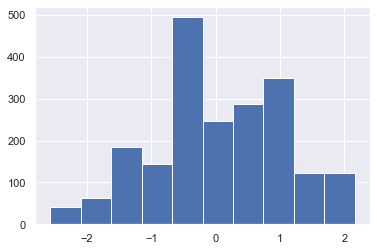

In [40]:
# Protected land Area histogram
dfprol_90 = dfpro_90
from matplotlib.pyplot import hist
dfprol_90 = pd.DataFrame({
    'Country': np.random.randn(100),
    '1990': 100 * np.random.rand()
})
_ = hist(dfprol_90.Country, weights=dfprol_90['1990'])


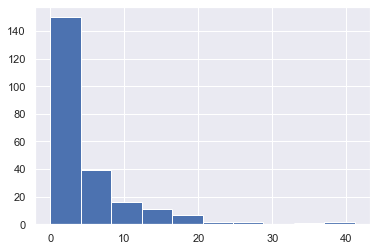

In [41]:
plt.hist(dfpro_90['1990'].astype(float), bins=10)
plt.show()

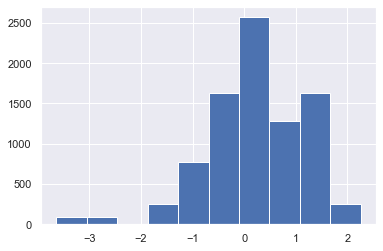

In [42]:
# Protected Area histogram
dforl_90 = dfor_90
from matplotlib.pyplot import hist
dforl_90 = pd.DataFrame({
    'Country': np.random.randn(100),
    '1990': 100 * np.random.rand()
})
_ = hist(dforl_90.Country, weights=dforl_90['1990'])


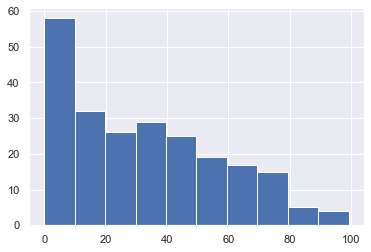

In [43]:
plt.hist(dfor_90['1990'].astype(float), bins=10)
plt.show()

# 10. Scatterplot with a regression line using seaborn.regplot to show the relationship between the proportion of land area covered by forest and the percentage of area protected by land in 2000

In [44]:
#slicing the dataframe for 

dfor_2000 = df_for.loc[:, ('Country','2000') ].fillna(0).reset_index(drop = True)
display(dfor_2000)

dfpro_2000 = df_pro.loc[:, ('Country','2000') ].fillna(0).reset_index(drop = True)
display(dfpro_2000)

,Country,2000
0,Afghanistan,2.1
1,Albania,28.1
2,Algeria,0.7
3,American Samoa,90
4,Andorra,35.6
...,...,...
225,Western Sahara,2.7
226,Yemen,1
227,Yugoslavia [former Socialist Federal Republic],0
228,Zambia,68.8


,Country,2000
0,Afghanistan,0.36
1,Albania,0.48
2,Algeria,5.98
3,American Samoa,0.06
4,Andorra,9.25
...,...,...
225,Western Sahara,0
226,Yemen,0.36
227,Yugoslavia [former Socialist Federal Republic],0
228,Zambia,36.06


In [45]:
#concatenating DataFrames along columns
dfcon = pd.concat([dfor_2000,dfpro_2000['2000']], axis=1)

In [46]:
#renaming both '2000' columns
dfcon.columns = ["Country", "for_2000", "lan_2000"]
dfcon

,Country,for_2000,lan_2000
0,Afghanistan,2.1,0.36
1,Albania,28.1,0.48
2,Algeria,0.7,5.98
3,American Samoa,90,0.06
4,Andorra,35.6,9.25
...,...,...,...
225,Western Sahara,2.7,0
226,Yemen,1,0.36
227,Yugoslavia [former Socialist Federal Republic],0,0
228,Zambia,68.8,36.06


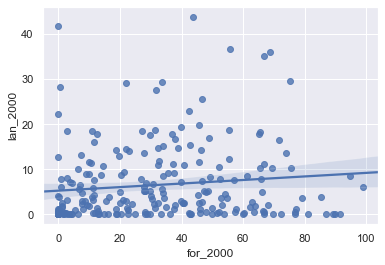

In [47]:
#regression plot 
sns.regplot(data=dfcon, x=dfcon["for_2000"].astype(float), y=dfcon["lan_2000"].astype(float))
plt.show()

# 11.log transform variables in order to calculate a correlation coefficient. Log transform variables and show the transformed distributions in a histogram.

In [48]:
dfcon['log_for_2000'] = np.log10(dfcon['for_2000'].astype(float))
dfcon['log_lan_2000'] = np.log10(dfcon['lan_2000'].astype(float))
display(dfcon)
#slicing transformed columns
dflog = dfcon.loc[ : , ('Country', 'log_for_2000', 'log_lan_2000')]
display(dflog)

,Country,for_2000,lan_2000,log_for_2000,log_lan_2000
0,Afghanistan,2.1,0.36,0.322219,-0.443697
1,Albania,28.1,0.48,1.448706,-0.318759
2,Algeria,0.7,5.98,-0.154902,0.776701
3,American Samoa,90,0.06,1.954243,-1.221849
4,Andorra,35.6,9.25,1.551450,0.966142
...,...,...,...,...,...
225,Western Sahara,2.7,0,0.431364,-inf
226,Yemen,1,0.36,0.000000,-0.443697
227,Yugoslavia [former Socialist Federal Republic],0,0,-inf,-inf
228,Zambia,68.8,36.06,1.837588,1.557026


,Country,log_for_2000,log_lan_2000
0,Afghanistan,0.322219,-0.443697
1,Albania,1.448706,-0.318759
2,Algeria,-0.154902,0.776701
3,American Samoa,1.954243,-1.221849
4,Andorra,1.551450,0.966142
...,...,...,...
225,Western Sahara,0.431364,-inf
226,Yemen,0.000000,-0.443697
227,Yugoslavia [former Socialist Federal Republic],-inf,-inf
228,Zambia,1.837588,1.557026
